In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os

### Ans to Qn 1

#### Reading the images

In [2]:
color_image = cv2.imread('images/img_6.png',1)
grey_image = cv2.imread('images/img_6.png',0)

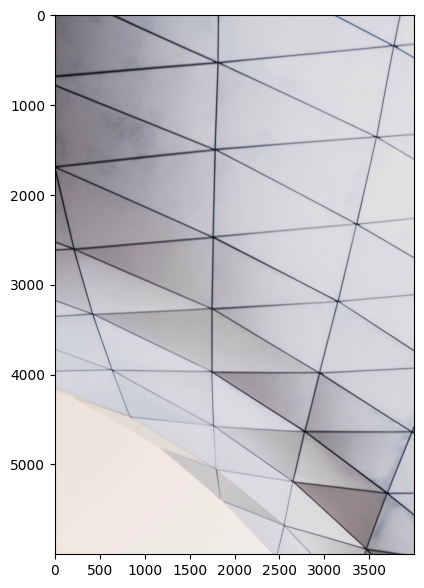

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(color_image)

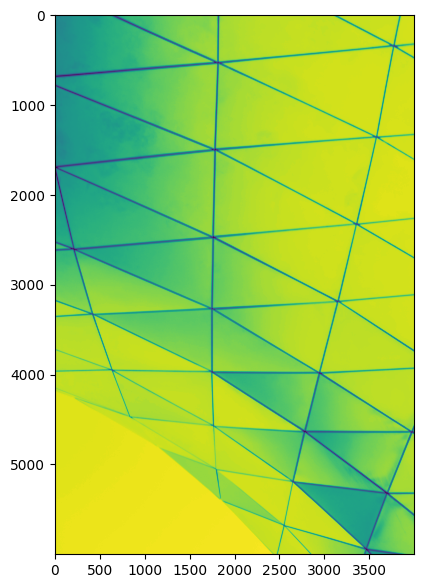

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(grey_image)

#### Removing noise 

In [5]:
color_image_updated = cv2.GaussianBlur(color_image,(3,3),0)

In [6]:
grey_image_updated = cv2.GaussianBlur(grey_image, (3,3), 0)

#### i. Using the Sobel X filter

In [7]:
color_image_sobel_x = cv2.Sobel(color_image_updated, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)

In [8]:
grey_image_sobel_x = cv2.Sobel(grey_image_updated, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


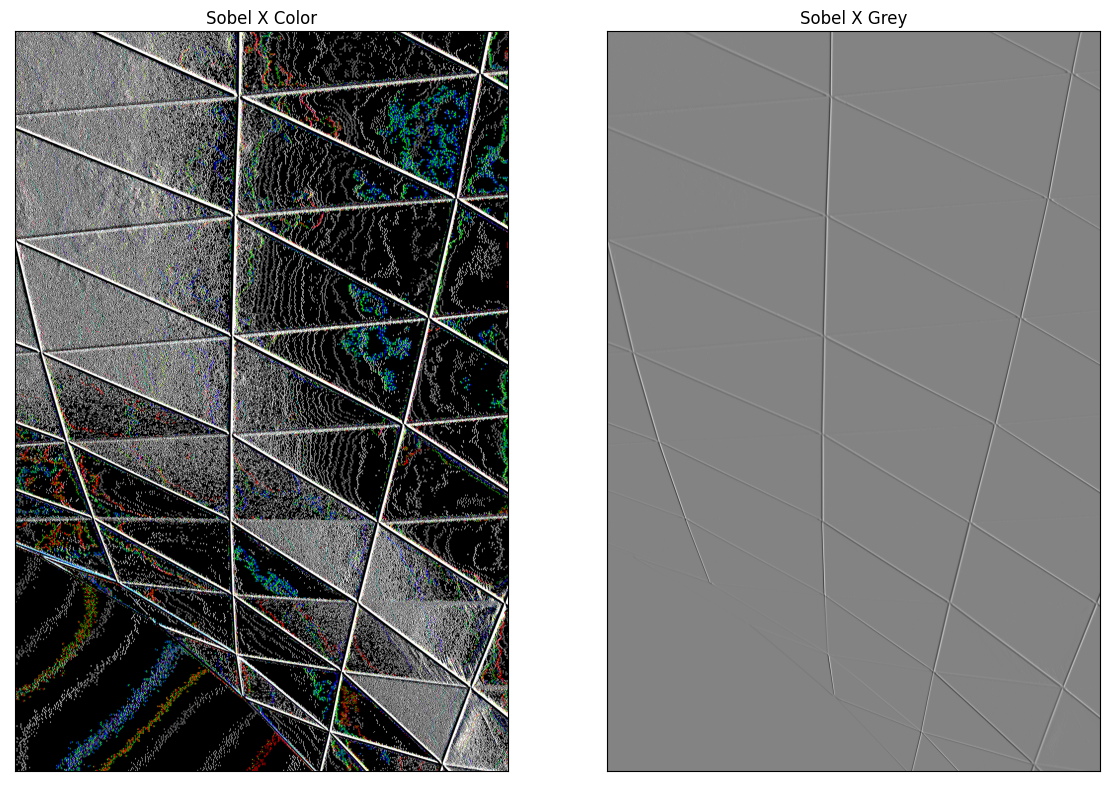

In [9]:
plt.figure(figsize=(14,14))
plt.subplot(121),plt.imshow(color_image_sobel_x, cmap='gray')
plt.title('Sobel X Color'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(grey_image_sobel_x, cmap='gray')
plt.title('Sobel X Grey'), plt.xticks([]), plt.yticks([])
plt.show()

#### ii. Using the Sobel Y filter

In [10]:
color_image_sobel_y = cv2.Sobel(color_image_updated, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)

In [11]:
grey_image_sobel_y = cv2.Sobel(grey_image_updated, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


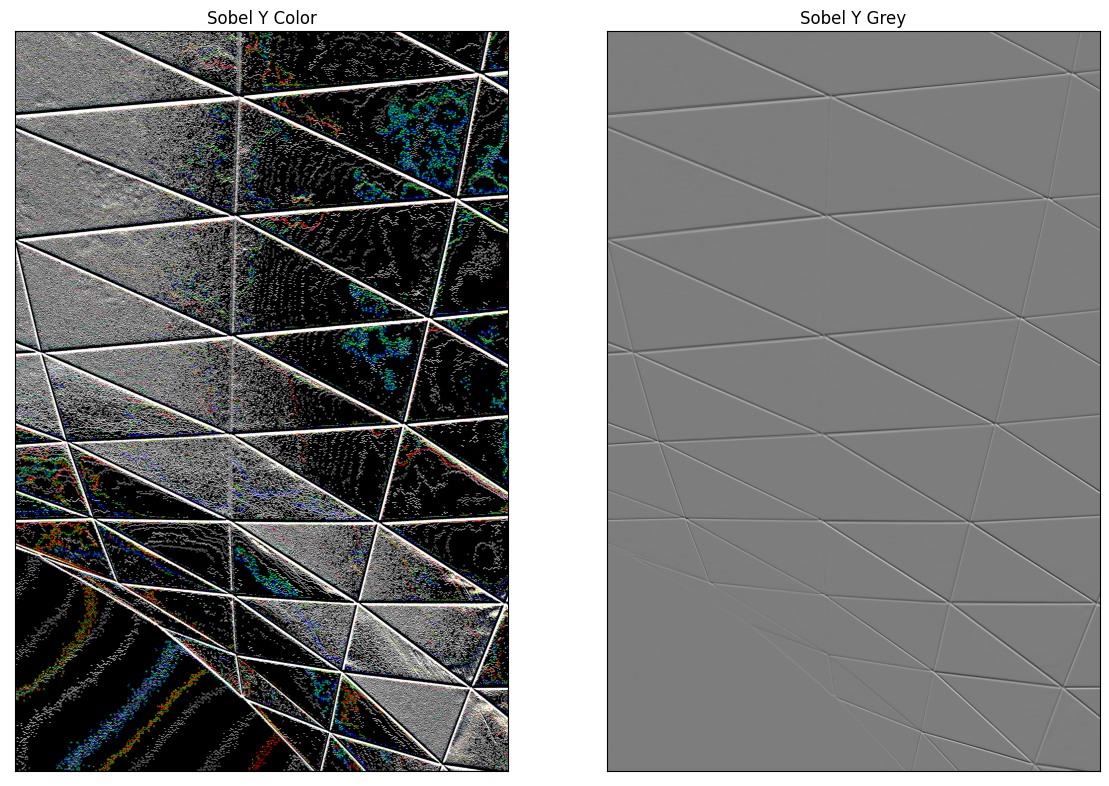

In [12]:
plt.figure(figsize=(14,14))
plt.subplot(121),plt.imshow(color_image_sobel_y, cmap='gray')
plt.title('Sobel Y Color'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(grey_image_sobel_y, cmap='gray')
plt.title('Sobel Y Grey'), plt.xticks([]), plt.yticks([])
plt.show()

#### Comparison of X vs Y for both color and grey images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


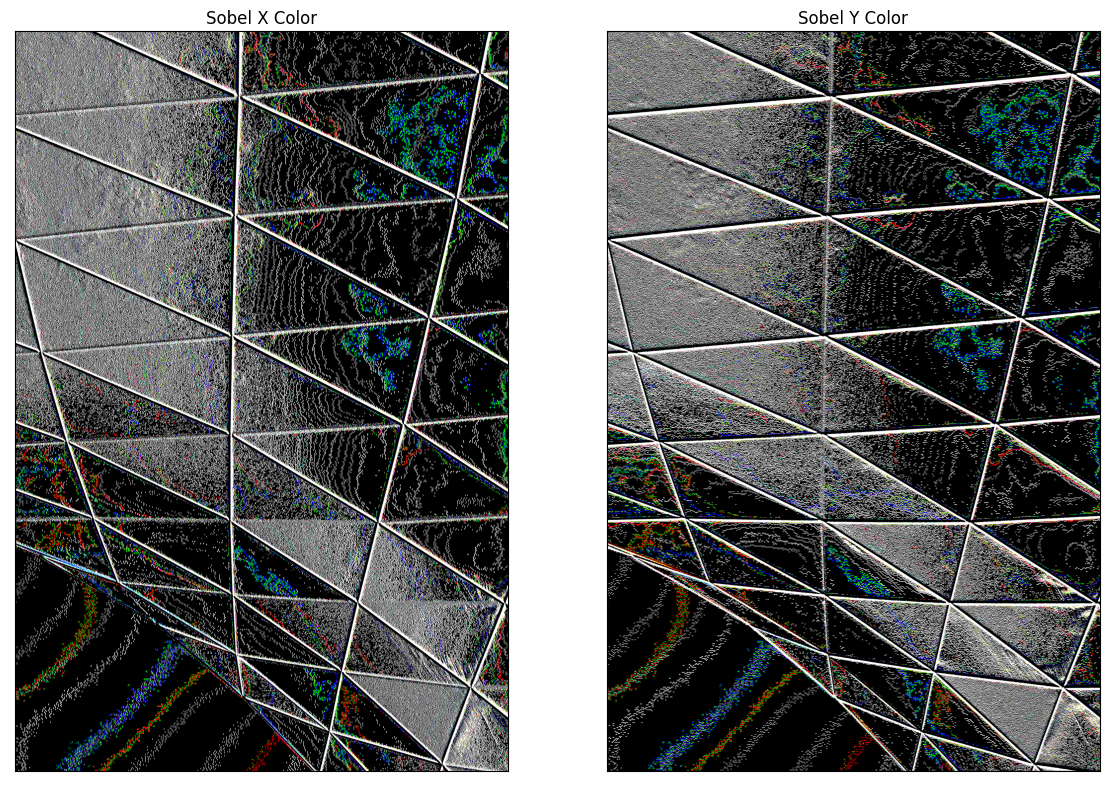

In [13]:
plt.figure(figsize=(14,14))
plt.subplot(121),plt.imshow(color_image_sobel_x, cmap='gray')
plt.title('Sobel X Color'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(color_image_sobel_y, cmap='gray')
plt.title('Sobel Y Color'), plt.xticks([]), plt.yticks([])
plt.show()

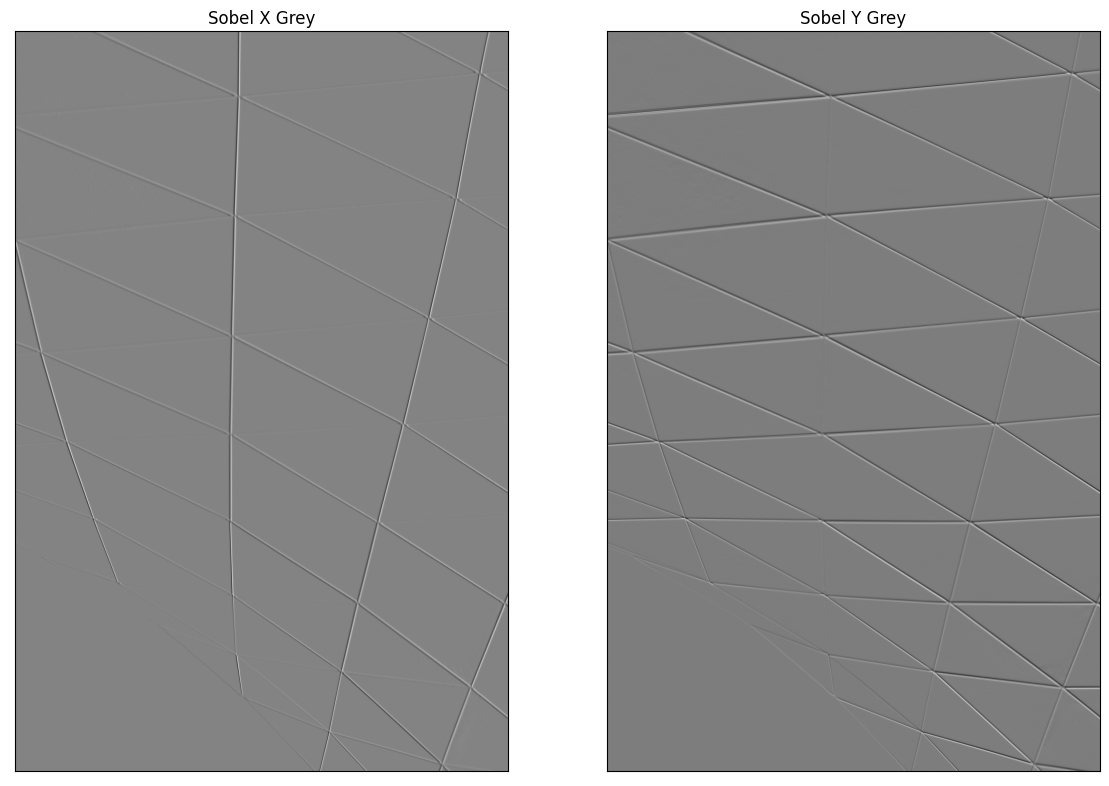

In [14]:
plt.figure(figsize=(14,14))
plt.subplot(121),plt.imshow(grey_image_sobel_x, cmap='gray')
plt.title('Sobel X Grey'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(grey_image_sobel_y, cmap='gray')
plt.title('Sobel Y Grey'), plt.xticks([]), plt.yticks([])
plt.show()

#### iii. Gradient Magnitude

In [15]:
# gradient magnitude for color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


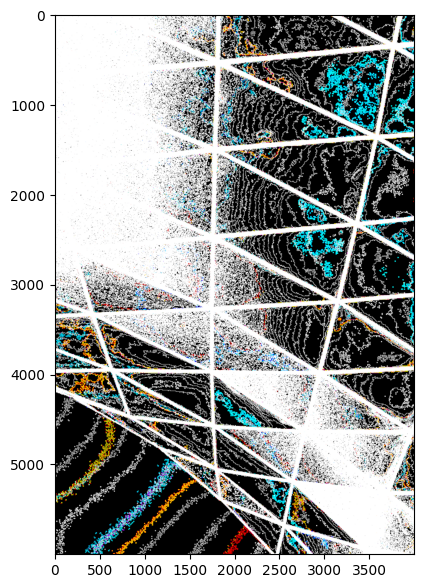

In [16]:
gradient_magnitude_color = np.sqrt(color_image_sobel_x ** 2 + color_image_sobel_y ** 2)
plt.figure(figsize=(7,7))
plt.imshow(gradient_magnitude_color)

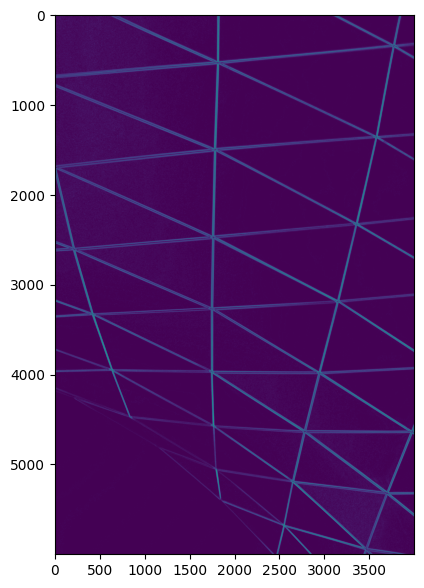

In [17]:
gradient_magnitude_grey = np.sqrt(grey_image_sobel_x ** 2 + grey_image_sobel_y ** 2)
plt.figure(figsize=(7,7))
plt.imshow(gradient_magnitude_grey)

#### iv. Interpretation

##### 1. Sobel filters applied in the x and y direction lets us find edges in the x and y directions.
##### 2. Finding the gradient magnitude helps to find the edges in both the x and y directions combined
##### 3. Evidently, Edge detection using sobel works better on grey images as compared to colored images because of least amount of noise in the grey images

### Ans to Qn 2

#### 1. Generating image with salt and pepper filter

In [18]:
import random
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

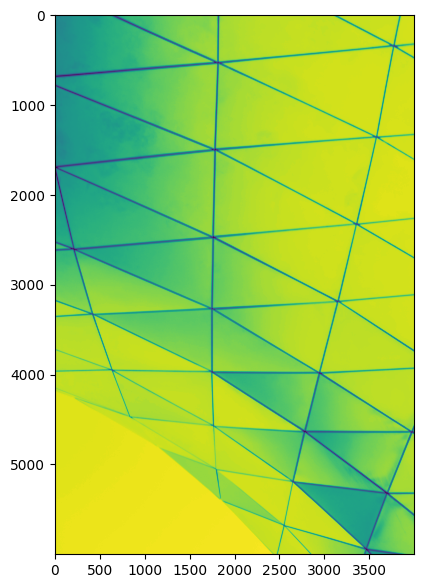

In [19]:
plt.figure(figsize=(7,7))
plt.imshow(grey_image)

In [20]:
noise_img = sp_noise(grey_image,0.2)

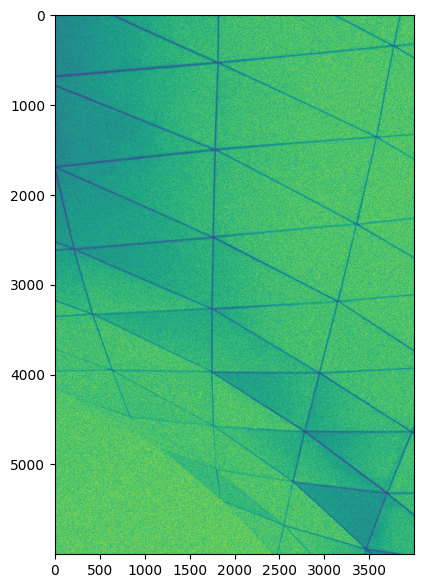

In [21]:
plt.figure(figsize=(7,7))
plt.imshow(noise_img)

#### 2. Implementing median filter

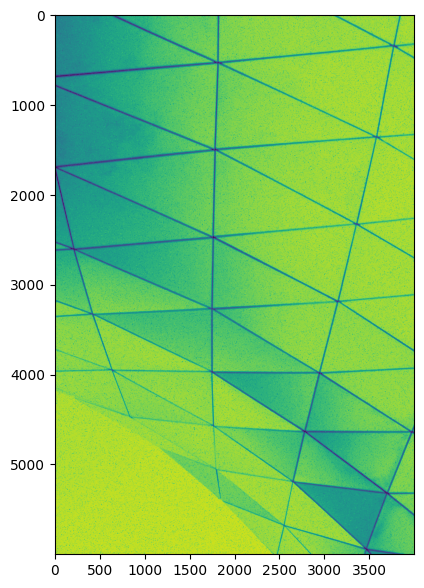

In [22]:
grey_image_medianblur3 = cv2.medianBlur(noise_img,3)
plt.figure(figsize=(7,7))
plt.imshow(grey_image_medianblur3)

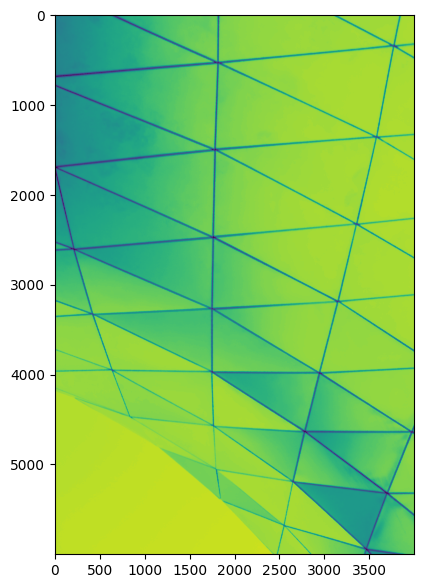

In [23]:
grey_image_medianblur9 = cv2.medianBlur(noise_img,9)
plt.figure(figsize=(7,7))
plt.imshow(grey_image_medianblur9)

#### 3. Gaussian filter size

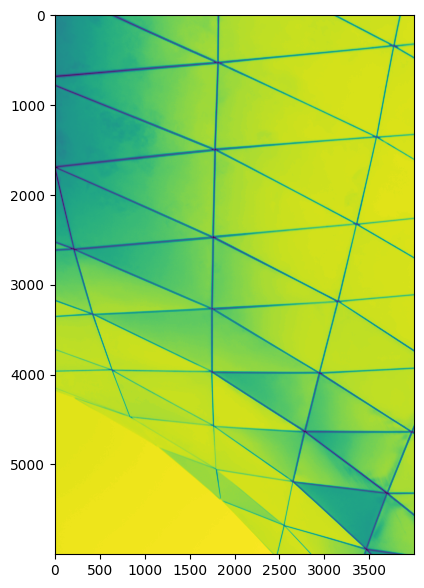

In [24]:
grey_image_gaussian_blur = cv2.GaussianBlur(grey_image, (3,3), 0)
plt.figure(figsize=(7,7))
plt.imshow(grey_image_gaussian_blur)

In [25]:
# sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8

##### In this particular instance too, we can see the median filter removing noise very similar to the guassian filter.
##### With the kernel size of (3,3) and sigma of 0.8 we can see it achieves similar level of noise reduction as median blur with kernel size of 9

#### 4. Comparing the effects

##### In general, median filter should perform better than the gaussian blur in scenarios like the salt and pepper noise. In gaussian filters, the central value is a newly calculated value which could be similar or different to the pixel value of the image. But in median filter, the central value is always replaced by some pixel value in the image. Hence it reduces noise effectively.

### Ans to Question 3

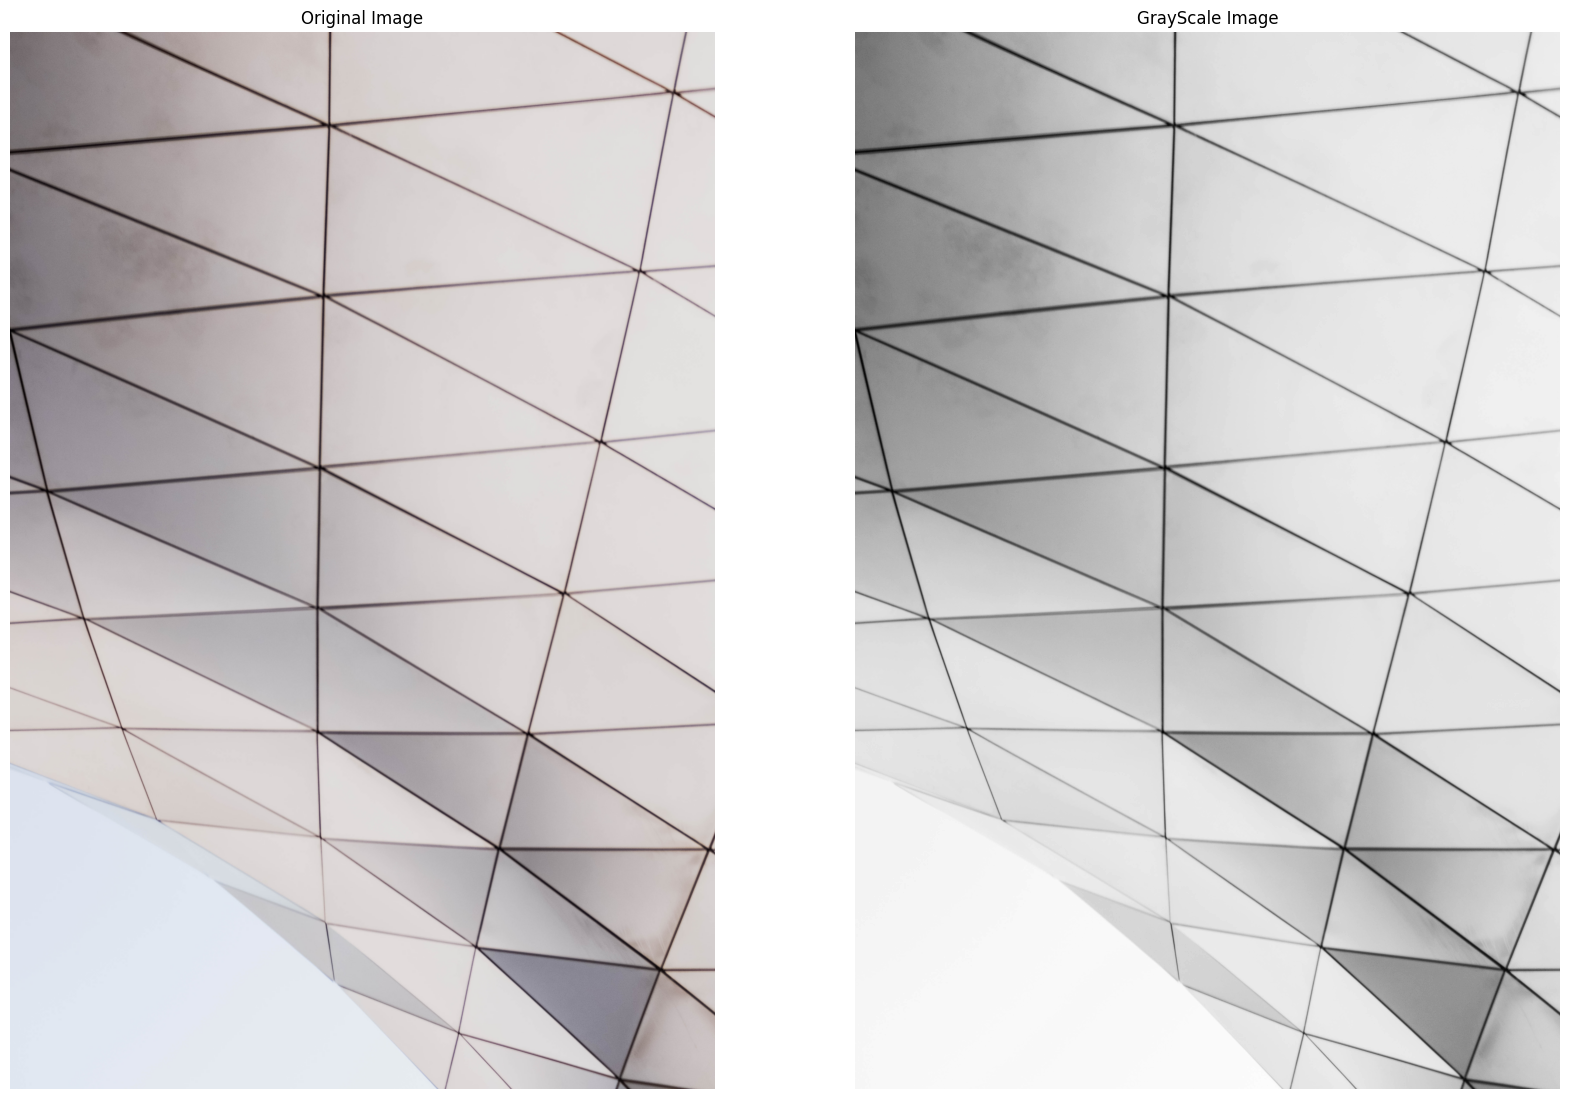

In [26]:
loaded_image = cv2.imread("images/img_6.png")
loaded_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)
 
gray_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)
 
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

#### Trying 3 set of thresholds

In [27]:
edged_image1 = cv2.Canny(gray_image, threshold1=30, threshold2=60)
edged_image2 = cv2.Canny(gray_image, threshold1=10, threshold2=100)
edged_image3 = cv2.Canny(gray_image, threshold1=30, threshold2=90)

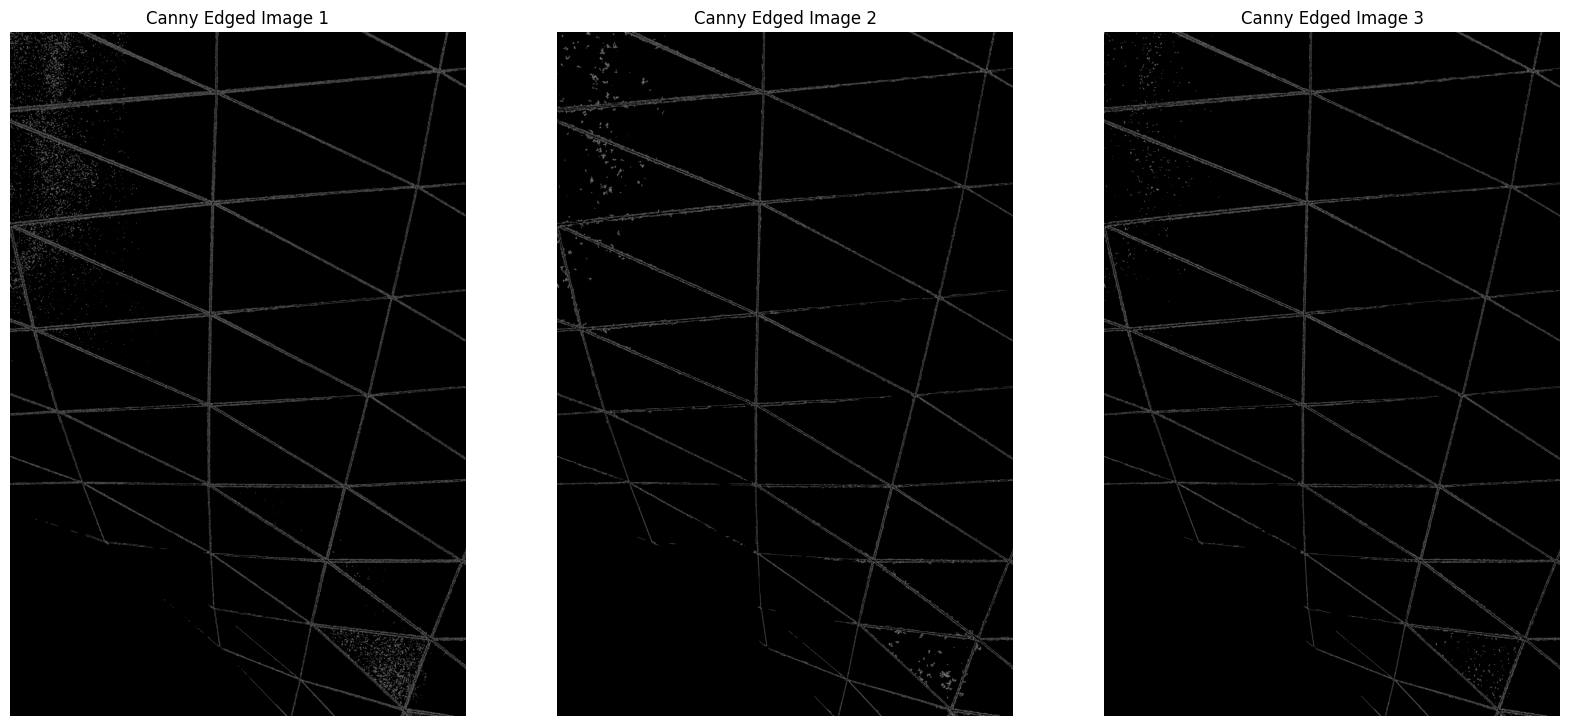

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(edged_image1,cmap="gray")
plt.axis("off")
plt.title("Canny Edged Image 1")
plt.subplot(1,3,2)
plt.imshow(edged_image2,cmap="gray")
plt.axis("off")
plt.title("Canny Edged Image 2")
plt.subplot(1,3,3)
plt.imshow(edged_image3,cmap="gray")
plt.axis("off")
plt.title("Canny Edged Image 3")
plt.show()

##### There are many factors that would influence the identification of object boundaries like contrast in pixel values between the objects boundaries and the background, how illuminated the objects are, etc. A consistently successful object boundary detection will help with more accuracy in applications like lane assist technology in cars.

In [29]:
# References:
#https://datahacker.rs/opencv-sobel-operator-and-image-gradient/
#https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/
#https://theailearner.com/tag/cv2-sobel/
#https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
#https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
#https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
#https://www.frontiersin.org/articles/10.3389/fams.2022.918357/full
#https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
#https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa
#https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
#https://www.askpython.com/python/examples/edge-detection-in-images